# Homework 4
### Marco Sicklinger, April 2021

## Prerequisites

In [262]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from scripts import mnist

### Accuracy function

In [263]:
def accuracy(y_hat, y):
    '''
    Accuracy function implemented during lab
    '''
    classes_prediction = y_hat.argmax(dim=1)
    match_ground_truth = classes_prediction == y
    correct_matches = match_ground_truth.sum()
    return (correct_matches / y_hat.shape[0]).item()

### Average meter class

In [270]:
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

### Model class

In [265]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),

            nn.BatchNorm1d(num_features=128),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(p=.2), # we add a dropout here. it's referred to the previous layer (with 32 neurons)

            nn.BatchNorm1d(num_features=256),
            nn.Linear(256, 192),
            nn.ReLU(),

            nn.BatchNorm1d(num_features=192),
            nn.Linear(192, 10)
        )


    def forward(self, X):
        return self.layers(X)

### Criterion 

In [266]:
criterion = nn.CrossEntropyLoss()

### Data

In [145]:
minibatch_size_train = 256
minibatch_size_test = 512

trainloader, testloader, trainset, testset = mnist.get_data(batch_size_train=minibatch_size_test, batch_size_test=minibatch_size_test)

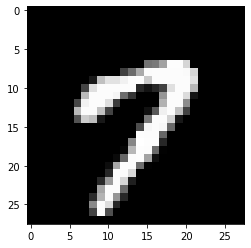

In [146]:
_ = plt.imshow(trainset.data[15].numpy(), cmap="gray")

### Training function

In [147]:
def training(model, criterion, optimizer, trainloader, epochs = 20):
    # creating container for saving loss and accuracy measurments
    performance_training = [[None],[None],[None]]
    steps = 0

    for i in range(epochs):
        print('\n')
        print('Epoch {}\n'.format(i+1))
        steps += 1

        ############
        # TRAINING #
        ############
        loss_meter_train = AverageMeter()
        accuracy_meter_train = AverageMeter()
        model.train()
        for X, y in trainloader:
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            acc = accuracy(y_hat, y)
            loss_meter_train.update(val=loss.item(), n=X.shape[0])
            accuracy_meter_train.update(val=acc, n=X.shape[0])
        print('TRAINING loss {:.4f} (avg {:.4f}) - TRAINING accuracy {:.4f}\n'.format(loss_meter_train.sum, loss_meter_train.avg, accuracy_meter_train.avg))
        # saving values of loss and accuracy
        performance_training[0].append(loss_meter_train.sum)
        performance_training[1].append(loss_meter_train.avg)
        performance_training[2].append(accuracy_meter_train.avg)

        if accuracy_meter_train.avg >= 0.9999:
            print('######################')
            print('# TRAINING COMPLETED #')
            print('######################')
            break

    return performance_training, steps

## Assignment 1

### Training
Two optimizers have been used.

#### Adam optimizer

In [148]:
model = MLP()
learning_rate = .00005
optimizer_1 = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [149]:
num_epochs = 2000
performance_training, completed_epochs = training(model, criterion, optimizer_1, trainloader, epochs = num_epochs)



Epoch 1

TRAINING loss 77000.8445 (avg 1.2833) - TRAINING accuracy 0.6480



Epoch 2

TRAINING loss 32812.9643 (avg 0.5469) - TRAINING accuracy 0.8745



Epoch 3

TRAINING loss 22357.2342 (avg 0.3726) - TRAINING accuracy 0.9088



Epoch 4

TRAINING loss 17600.4146 (avg 0.2933) - TRAINING accuracy 0.9245



Epoch 5

TRAINING loss 14654.3591 (avg 0.2442) - TRAINING accuracy 0.9363



Epoch 6

TRAINING loss 12640.5459 (avg 0.2107) - TRAINING accuracy 0.9440



Epoch 7

TRAINING loss 11056.2859 (avg 0.1843) - TRAINING accuracy 0.9510



Epoch 8

TRAINING loss 9861.5050 (avg 0.1644) - TRAINING accuracy 0.9556



Epoch 9

TRAINING loss 8887.1753 (avg 0.1481) - TRAINING accuracy 0.9600



Epoch 10

TRAINING loss 8014.5519 (avg 0.1336) - TRAINING accuracy 0.9634



Epoch 11

TRAINING loss 7395.0406 (avg 0.1233) - TRAINING accuracy 0.9670



Epoch 12

TRAINING loss 6770.8705 (avg 0.1128) - TRAINING accuracy 0.9688



Epoch 13

TRAINING loss 6212.6074 (avg 0.1035) - TRAINING accuracy 0.9710




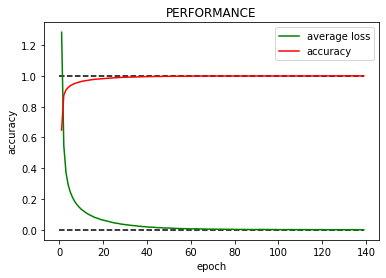

In [163]:
axis = [i for i in range(completed_epochs+1)]
one = [1 for i in range(completed_epochs+1)]
zero = [0 for i in range(completed_epochs+1)]
_ = plt.plot(axis, one, linestyle = 'dashed', color = 'black')
_ = plt.plot(axis, zero, linestyle = 'dashed', color = 'black')
_ = plt.plot(axis, performance_training[1], label = 'average loss', color = 'green')
__ = plt.xlabel('epoch') 
axis = [i for i in range(completed_epochs+1)]
_ = plt.plot(axis, performance_training[2], label = 'accuracy', color = 'red')
__ = plt.xlabel('epoch') 
___ = plt.ylabel('loss & accuracy')
____ = plt.title('PERFORMANCE')
_____ = plt.legend()

#### SGD with momentum

In [180]:
model = MLP()
learning_rate = .001
momentum = .9
optimizer_2 = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = momentum)

In [181]:
num_epochs = 2000
performance_training, completed_epochs = training(model, criterion, optimizer_2, trainloader, epochs = num_epochs)



Epoch 1

TRAINING loss 58548.9101 (avg 0.9758) - TRAINING accuracy 0.7349



Epoch 2

TRAINING loss 22458.8921 (avg 0.3743) - TRAINING accuracy 0.9063



Epoch 3

TRAINING loss 16779.3823 (avg 0.2797) - TRAINING accuracy 0.9263



Epoch 4

TRAINING loss 13954.7608 (avg 0.2326) - TRAINING accuracy 0.9367



Epoch 5

TRAINING loss 12211.5944 (avg 0.2035) - TRAINING accuracy 0.9444



Epoch 6

TRAINING loss 10911.8113 (avg 0.1819) - TRAINING accuracy 0.9498



Epoch 7

TRAINING loss 9923.4348 (avg 0.1654) - TRAINING accuracy 0.9533



Epoch 8

TRAINING loss 9025.0702 (avg 0.1504) - TRAINING accuracy 0.9589



Epoch 9

TRAINING loss 8331.5396 (avg 0.1389) - TRAINING accuracy 0.9613



Epoch 10

TRAINING loss 7838.5648 (avg 0.1306) - TRAINING accuracy 0.9637



Epoch 11

TRAINING loss 7350.5931 (avg 0.1225) - TRAINING accuracy 0.9651



Epoch 12

TRAINING loss 6914.2388 (avg 0.1152) - TRAINING accuracy 0.9679



Epoch 13

TRAINING loss 6544.1898 (avg 0.1091) - TRAINING accuracy 0.9688





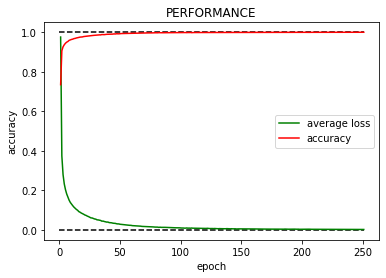

In [182]:
axis = [i for i in range(completed_epochs+1)]
one = [1 for i in range(completed_epochs+1)]
zero = [0 for i in range(completed_epochs+1)]
_ = plt.plot(axis, one, linestyle = 'dashed', color = 'black')
_ = plt.plot(axis, zero, linestyle = 'dashed', color = 'black')
_ = plt.plot(axis, performance_training[1], label = 'average loss', color = 'green')
__ = plt.xlabel('epoch') 
axis = [i for i in range(completed_epochs+1)]
_ = plt.plot(axis, performance_training[2], label = 'accuracy', color = 'red')
__ = plt.xlabel('epoch') 
___ = plt.ylabel('loss & accuracy')
____ = plt.title('PERFORMANCE')
_____ = plt.legend()

One can notice that the chosen Adam optimizer (with $\lambda = 5\cdot 10^{-5}$, where $\lambda$ is the learning rate) takes less epochs to reach target accuracy with respect to the SGD optimizer (with $\lambda = 10^{-3}$ and $\rho = 0.9$, where $\lambda$ is the learning rate and $\rho$ the momentum).

## Assignment 2

In [253]:
minibatch_size_train = 256
minibatch_size_test = 512

_, testloader, trainset, testset = mnist.get_data(batch_size_train=minibatch_size_test, batch_size_test=minibatch_size_test)

In order to complete the second task is required to permute the targets in the training set: this is done by creating new permuted indeces in the range of the size of the targets' tensor and shuffling the `trainset.targets` according to this new indeces. 

In [254]:
print('targets before permutation')
print(trainset.targets)
# compute new permuted indeces
perm_idx = torch.randperm(trainset.targets.shape[0])
# get new trainset by shuffling targets according to new indeces
trainset_targets_permuted = trainset.targets[perm_idx]
# set new targets as trainset
trainset.targets = trainset_targets_permuted
print('\ntargets after permutation')
print(trainset.targets)
# new trainloader
trainloader_permuted = torch.utils.data.DataLoader(trainset, batch_size=minibatch_size_train, shuffle=True)

targets before permutation
tensor([5, 0, 4,  ..., 5, 6, 8])

targets after permutation
tensor([2, 9, 2,  ..., 5, 1, 2])


### Training function

In [255]:
def training(model, criterion, optimizer, trainloader, epochs = 20):
    # creating container for saving loss and accuracy measurments
    performance_training = [[None],[None],[None]]
    steps = 0

    for i in range(epochs):
        print('\n')
        print('Epoch {}\n'.format(i+1))
        steps += 1

        ############
        # TRAINING #
        ############
        loss_meter_train = AverageMeter()
        accuracy_meter_train = AverageMeter()
        model.train()
        for X, y in trainloader:
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            acc = accuracy(y_hat, y)
            loss_meter_train.update(val=loss.item(), n=X.shape[0])
            accuracy_meter_train.update(val=acc, n=X.shape[0])
        print('TRAINING loss {:.4f} (avg {:.4f}) - TRAINING accuracy {:.4f}\n'.format(loss_meter_train.sum, loss_meter_train.avg, accuracy_meter_train.avg))
        performance_training[0].append(loss_meter_train.sum)
        performance_training[1].append(loss_meter_train.avg)
        performance_training[2].append(accuracy_meter_train.avg)

        if accuracy_meter_train.avg >= 0.9999:
            print('######################')
            print('# TRAINING COMPLETED #')
            print('######################')
            break

    return performance_training, steps

### Training

Since in this case training is expected to be harder, the network has been enlarged.

In [256]:
class MLP_wider(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 1024),
            nn.ReLU(),

            nn.BatchNorm1d(num_features=1024),
            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.Dropout(p=.2), # we add a dropout here. it's referred to the previous layer (with 32 neurons)

            nn.BatchNorm1d(num_features=2048),
            nn.Linear(2048, 1536),
            nn.ReLU(),

            nn.BatchNorm1d(num_features=1536),
            nn.Linear(1536, 10)
        )


    def forward(self, X):
        return self.layers(X)

#### Adam optimizer

In [257]:
model = MLP_wider()
learning_rate = .00005
optimizer_3 = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [258]:
num_epochs = 2000
performance_training, completed_epochs = training(model, criterion, optimizer_3, trainloader_permuted, epochs = num_epochs)

54) - TRAINING accuracy 0.9981



Epoch 1745

TRAINING loss 391.9581 (avg 0.0065) - TRAINING accuracy 0.9978



Epoch 1746

TRAINING loss 283.9016 (avg 0.0047) - TRAINING accuracy 0.9986



Epoch 1747

TRAINING loss 247.0490 (avg 0.0041) - TRAINING accuracy 0.9987



Epoch 1748

TRAINING loss 252.3882 (avg 0.0042) - TRAINING accuracy 0.9985



Epoch 1749

TRAINING loss 260.9426 (avg 0.0043) - TRAINING accuracy 0.9984



Epoch 1750

TRAINING loss 270.1106 (avg 0.0045) - TRAINING accuracy 0.9986



Epoch 1751

TRAINING loss 342.1277 (avg 0.0057) - TRAINING accuracy 0.9982



Epoch 1752

TRAINING loss 292.1978 (avg 0.0049) - TRAINING accuracy 0.9984



Epoch 1753

TRAINING loss 308.4148 (avg 0.0051) - TRAINING accuracy 0.9984



Epoch 1754

TRAINING loss 254.2664 (avg 0.0042) - TRAINING accuracy 0.9985



Epoch 1755

TRAINING loss 305.7201 (avg 0.0051) - TRAINING accuracy 0.9984



Epoch 1756

TRAINING loss 277.6719 (avg 0.0046) - TRAINING accuracy 0.9986



Epoch 1757

TRAINING loss 316.

One can notice that, by permuting targets' labels, training requires much more effort; in order to achieve better performance one could further enhance the network by adding more units, or maybe use a learning rate scheduler to increase precision (by decreasing the learning rate) when needed.

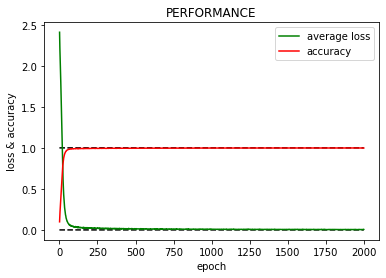

In [277]:
axis = [i for i in range(completed_epochs+1)]
one = [1 for i in range(completed_epochs+1)]
zero = [0 for i in range(completed_epochs+1)]
_ = plt.plot(axis, one, linestyle = 'dashed', color = 'black')
_ = plt.plot(axis, zero, linestyle = 'dashed', color = 'black')
_ = plt.plot(axis, performance_training[1], label = 'average loss', color = 'green')
__ = plt.xlabel('epoch') 
axis = [i for i in range(completed_epochs+1)]
_ = plt.plot(axis, performance_training[2], label = 'accuracy', color = 'red')
__ = plt.xlabel('epoch') 
___ = plt.ylabel('loss & accuracy')
____ = plt.title('PERFORMANCE')
_____ = plt.legend()

### Testing function

In [275]:
def test(model, dataloader, criterion = None):
    if criterion is not None:
        loss_meter_test = AverageMeter()
    accuracy_meter_test = AverageMeter()

    ###########
    # TESTING #
    ###########
    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            y_hat = model(X)
            loss = criterion(y_hat, y) if criterion is not None else None
            acc = accuracy(y_hat, y)
            if criterion is not None:
                loss_meter_test.update(loss.item(), X.shape[0])
            accuracy_meter_test.update(acc, X.shape[0])
    print('#####################')
    print('# TESTING COMPLETED #')
    print('#####################')
    print(f"loss {loss_meter_test.sum if criterion is not None else '--':.4f} (avg {loss_meter_test.avg if criterion is not None else '--':.4f}) - accuracy {accuracy_meter_test.avg:.4f}")

In [276]:
test(model, testloader, criterion)

#####################
# TESTING COMPLETED #
#####################
loss 2.8705 (avg 0.0000) - accuracy 1.0000
